## Data Import

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

f = open("./UCI HAR Dataset/train/y_train.txt")
y_data = f.read().split()
y_data = np.array(y_data)
y_data[0:10]
y_label = ["walking","walking_upstaires","walking_downstairs","sitting,standing","laying"]
f.close()
f = open("./UCI HAR Dataset/train/X_train.txt")
X_data_arr = f.read().split()
X_data_arr = np.reshape(X_data_arr,(7352,561))
print(np.shape(X_data_arr))
X_data = pd.DataFrame(X_data_arr)
f.close()
#ラベルデータ
f_label = []
with open('./UCI HAR Dataset/features.txt', mode='rt', encoding='utf-8') as f:
    for line in f:
        l = line.split()
        f_label.append(l[1])
print(len(f_label))
#学習用データ
X_train = X_data.values
Y_train = y_data
print(np.shape(X_train))
print(np.shape(Y_train))
#テスト用データ
f = open("./UCI HAR Dataset/test/y_test.txt")
Y_test = np.array(f.read().split())
print(np.shape(Y_test))
f.close()
f = open("./UCI HAR Dataset/test/X_test.txt")
X_test = f.read().split()
X_test = np.reshape(X_test,(len(Y_test),int(len(X_test)/len(Y_test))))
X_test = np.array(X_test, dtype=float)
print(np.shape(X_test))
X_test.dtype 

(7352, 561)
561
(7352, 561)
(7352,)
(2947,)
(2947, 561)


dtype('float64')

## l1ロジスティック回帰

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty="l2",C=0.1)
lr.fit(X_train,Y_train)

c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
def result_heatmap(Y_test,Y_pred):
    print(accuracy_score(Y_test, Y_pred))
    cm = confusion_matrix(Y_test, Y_pred)
    print(cm)
    sns.heatmap(cm,annot=True, cmap='Blues')

0.9582626399728538
[[493   0   3   0   0   0]
 [ 20 449   2   0   0   0]
 [  6  14 400   0   0   0]
 [  0   3   0 435  53   0]
 [  2   0   0  20 510   0]
 [  0   0   0   0   0 537]]


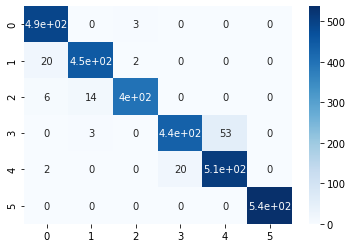

In [8]:
Y_pred = lr.predict(X_test)
result_heatmap(Y_test,Y_pred)

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty="l1",C=1,random_state=1) )
pipe_lr

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_range = [ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
param_grid = [{'logisticregression__C': param_range, 
               'logisticregression__penalty': ['l1']},
              {'logisticregression__C': param_range, 
               'logisticregression__penalty': ['l2']}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, Y_train)
print(gs.best_score_)
print(gs.best_params_)

c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.941784548422198
{'logisticregression__C': 1.0, 'logisticregression__penalty': 'l1'}


In [16]:
#LDA+L1ロジスティック
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
pipe_lda_lr = make_pipeline(StandardScaler(),
                            LDA(n_components=6),
                            LogisticRegression(penalty="l1",C=1,random_state=1) )
pipe_lda_lr.fit(X_train,Y_train)

c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_m

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lineardiscriminantanalysis', LinearDiscriminantAnalysis(n_components=6, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('logisticregression', LogisticRegression(C=1,...e, penalty='l1', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

0.9630132337970818
[[492   4   0   0   0   0]
 [ 13 457   0   1   0   0]
 [  1   6 413   0   0   0]
 [  0   2   0 427  62   0]
 [  0   0   0  20 512   0]
 [  0   0   0   0   0 537]]


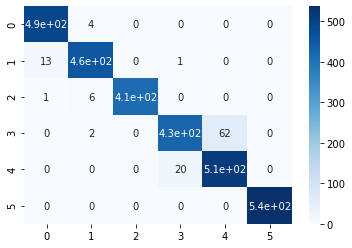

In [19]:
Y_pred= pipe_lda_lr.predict(X_test)

result_heatmap(Y_test,Y_pred)

c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9630132337970818
[[492   4   0   0   0   0]
 [ 13 457   0   1   0   0]
 [  1   6 413   0   0   0]
 [  0   2   0 427  62   0]
 [  0   0   0  20 512   0]
 [  0   0   0   0   0 537]]


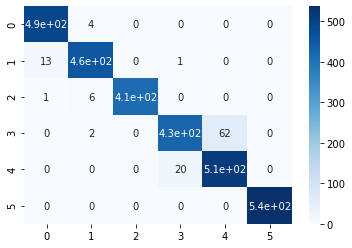

In [22]:
#普通のl1ロジスティック
pipe_lr.fit(X_train,Y_train)
Y_pred= pipe_lda_lr.predict(X_test)
result_heatmap(Y_test,Y_pred)

## l1ロジスティック回帰 C=1 : 0.96301